In [1]:
## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
## Data Preprocessing
# Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7392 files belonging to 5 classes.


In [5]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[7.87712402e+01 1.11177490e+02 8.79743652e+01]
   [8.89531250e+01 1.20953125e+02 9.70769043e+01]
   [1.07775146e+02 1.40775146e+02 1.11806396e+02]
   ...
   [1.53076172e-01 7.12595215e+01 7.49511719e-02]
   [1.07530029e+02 1.39076904e+02 1.10936279e+02]
   [8.44318848e+01 1.18066895e+02 9.15524902e+01]]

  [[1.02218750e+02 1.30218750e+02 1.05218750e+02]
   [1.07152588e+02 1.35305176e+02 1.09847412e+02]
   [1.04834229e+02 1.35824707e+02 1.04468750e+02]
   ...
   [2.25668945e+01 8.32890625e+01 1.67795410e+01]
   [1.07125977e+02 1.41297852e+02 1.08582764e+02]
   [8.96105957e+01 1.22893066e+02 9.34387207e+01]]

  [[1.02059326e+02 1.33059326e+02 1.02059326e+02]
   [1.02625000e+02 1.33625000e+02 1.02625000e+02]
   [1.04124512e+02 1.35124512e+02 1.01186523e+02]
   ...
   [1.12583252e+02 1.49521729e+02 9.55839844e+01]
   [1.27701172e+02 1.58716797e+02 1.17748047e+02]
   [1.00290527e+02 1.33684326e+02 9.09187012e+01]]

  ...

  [[1.42714844e+01 6.22558594e-02 0.00000000e+00]
   [1

In [8]:
# Building Model

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
# Building Convolution Laye

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
#Output Layer
model.add(Dense(units=5,activation='softmax'))

In [18]:
#Compiling Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    #learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [1]:
# model.summary()

In [21]:
#Model Training
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=4)

Epoch 1/4


231/231 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.4157 - loss: 1.1383 - val_accuracy: 0.5787 - val_loss: 0.9313
Epoch 2/4
231/231 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.6020 - loss: 0.8133 - val_accuracy: 0.6977 - val_loss: 0.6841
Epoch 3/4
231/231 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.6871 - loss: 0.6703 - val_accuracy: 0.7356 - val_loss: 0.6145
Epoch 4/4
231/231 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.7643 - loss: 0.5383 - val_accuracy: 0.7204 - val_loss: 0.7133


In [22]:
  #Model Evaluation on Training set

train_loss,train_acc = model.evaluate(training_set)

231/231 ━━━━━━━━━━━━━━━━━━━━ 77s 332ms/step - accuracy: 0.7863 - loss: 0.4984


In [23]:
print(train_loss,train_acc)

0.481989324092865 0.7969426512718201


In [24]:
#Model Evaluation on Validation set

val_loss,val_acc = model.evaluate(validation_set)

68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.7299 - loss: 0.6918


In [25]:
print(val_loss,val_acc)

0.7132781147956848 0.720370352268219


In [25]:
#Saving Model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.47930195927619934,
  0.631899356842041,
  0.7041395902633667,
  0.7763798832893372],
 'loss': [1.0088409185409546,
  0.7680671811103821,
  0.645410418510437,
  0.5225095748901367],
 'val_accuracy': [0.5787037014961243,
  0.697685182094574,
  0.7356481552124023,
  0.720370352268219],
 'val_loss': [0.9313248991966248,
  0.6841009855270386,
  0.6145499348640442,
  0.7132782340049744]}

In [28]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

In [29]:
# Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names
class_name

['Cauliflower_Healthy',
 'Cauliflower_Healthy_Leaf',
 'Cauliflower_Leaf_Black_Rot',
 'Cauliflower_Leaf_Red_Spot',
 'Cauliflower_Spot_Rot']

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [31]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step


(array([[9.8831832e-01, 3.1417791e-08, 1.4722401e-06, 1.1930730e-06,
         1.1679046e-02],
        [9.9040717e-01, 8.4540632e-09, 6.9678583e-07, 5.0982896e-07,
         9.5916493e-03],
        [9.5473707e-01, 3.7493241e-08, 8.8581106e-07, 1.3335368e-06,
         4.5260634e-02],
        ...,
        [8.5456129e-03, 2.5491073e-04, 8.4974095e-03, 2.9621279e-02,
         9.5308077e-01],
        [1.3888936e-02, 7.3200295e-04, 1.5429971e-02, 2.0282999e-02,
         9.4966614e-01],
        [5.1781401e-05, 5.0915833e-07, 3.6872402e-06, 9.9186989e-05,
         9.9984479e-01]], dtype=float32),
 (2160, 5))

In [32]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [33]:
predicted_categories

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4])>

In [34]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2024-06-06 20:46:40.996392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(2160, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4])>

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

       Cauliflower_Healthy       0.95      0.92      0.94       420
  Cauliflower_Healthy_Leaf       0.90      0.56      0.69       624
Cauliflower_Leaf_Black_Rot       0.47      0.81      0.59       372
 Cauliflower_Leaf_Red_Spot       0.51      0.44      0.47       372
      Cauliflower_Spot_Rot       0.88      0.96      0.92       372

                  accuracy                           0.72      2160
                 macro avg       0.74      0.74      0.72      2160
              weighted avg       0.76      0.72      0.72      2160



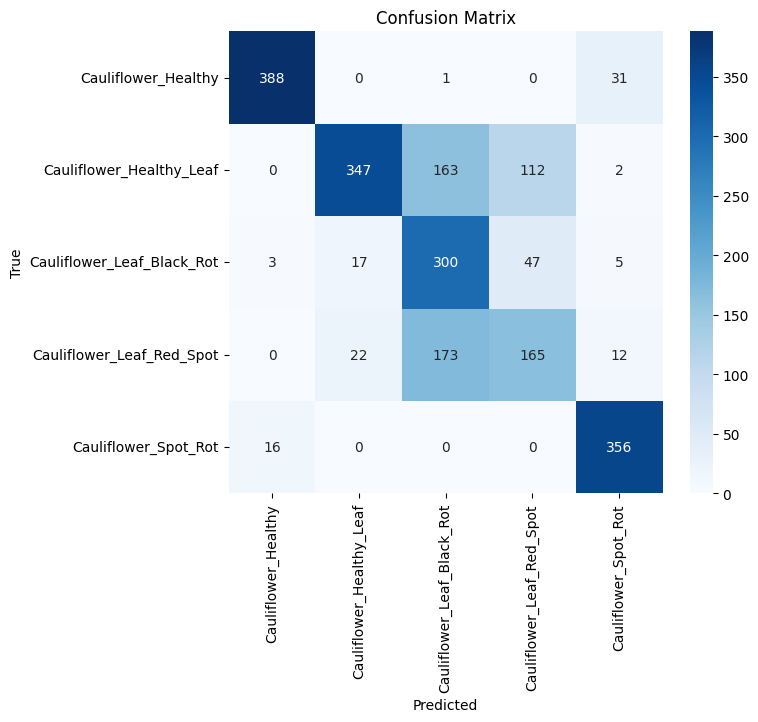

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Plot confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

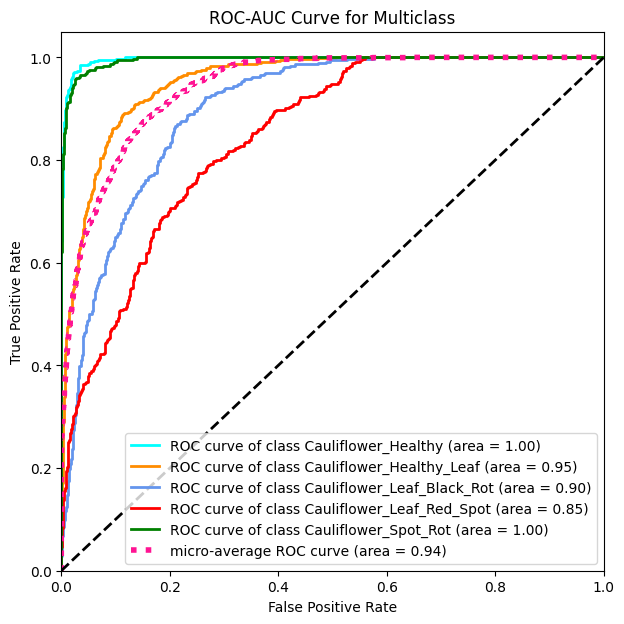

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the true categories
Y_true_binarized = label_binarize(Y_true, classes=[0, 1, 2, 3, 4])
n_classes = Y_true_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_binarized.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(7, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_name[i], roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

In [41]:
# plt.figure(figsize=(40, 40))
# sns.heatmap(cm,annot=True,annot_kws={"size": 40})

# plt.xlabel('Predicted Class',fontsize = 20)
# plt.ylabel('Actual Class',fontsize = 40)
# plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 40)
# plt.show()

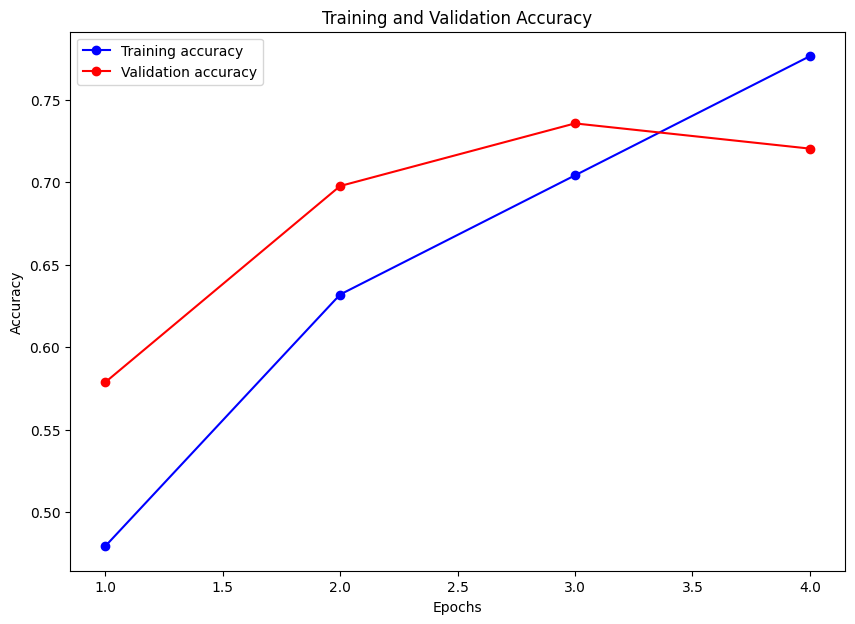

In [45]:
# Extract training and validation accuracy from the training history
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 7))
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

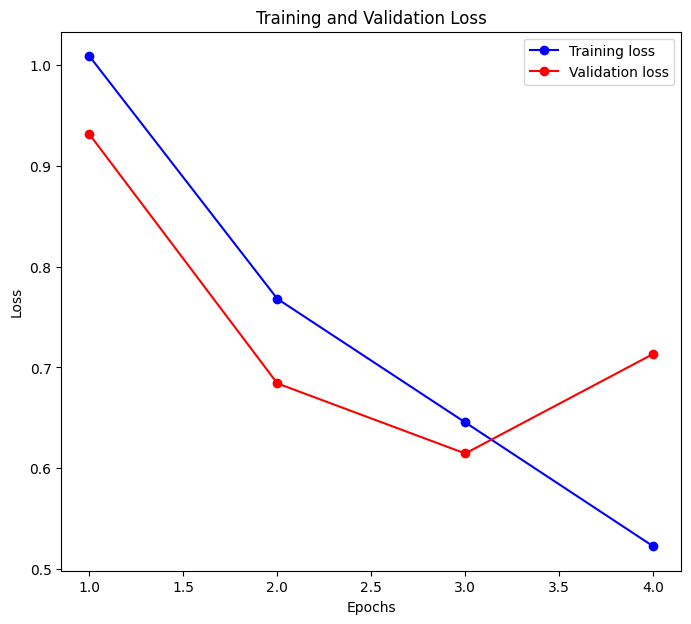

In [49]:
# Extract training and validation loss from the training history
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(8, 7))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

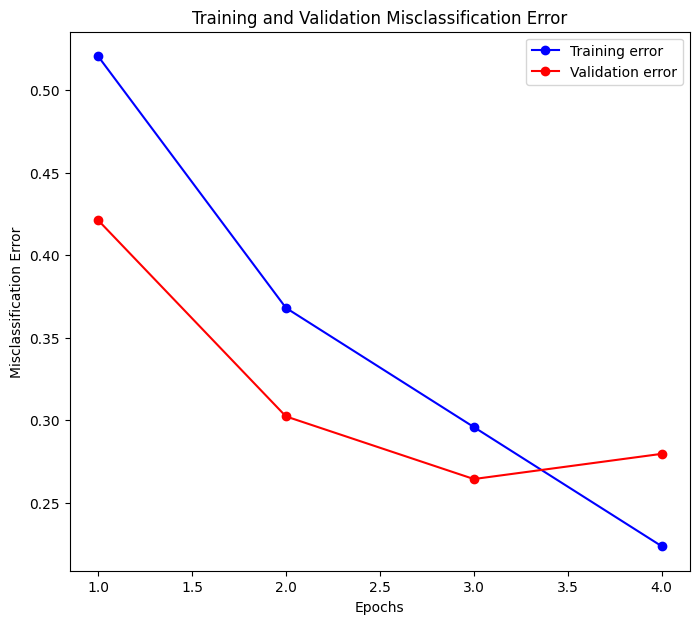

In [47]:
# Extract training and validation accuracy from the training history
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Compute misclassification error
train_error = [1 - acc for acc in accuracy]
val_error = [1 - acc for acc in val_accuracy]

# Plot misclassification error
plt.figure(figsize=(8, 7))
plt.plot(epochs, train_error, 'bo-', label='Training error')
plt.plot(epochs, val_error, 'ro-', label='Validation error')
plt.title('Training and Validation Misclassification Error')
plt.xlabel('Epochs')
plt.ylabel('Misclassification Error')
plt.legend()
plt.show()